In [0]:
#Data upto 21 May 2020
#Derived from dataset available at https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
#Created a model, achieved accuracy >99.7%

In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
def plot_series(time, series, deaths, recovered, format="-", start=0, end=None):
  plt.plot(time[start:end], recover[start:end], format, marker='o', color="#058c03", label = 'Recovered')
  plt.plot(time[start:end], deaths[start:end], format, marker='o', color="#991003", label = 'Deceased')  
  plt.plot(time[start:end], series[start:end], format, marker='o', color="#21095c", label = 'Positive Cases')
  plt.legend(loc="center")
  plt.xlabel("Time Step")
  plt.ylabel("Numbers")
  plt.title("Analysis of COVID19 upto May 21")
  plt.grid(True)

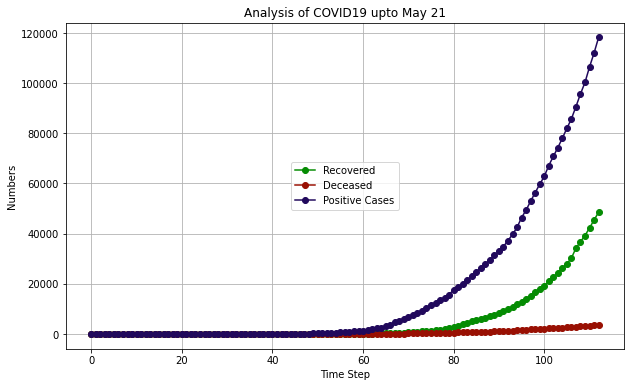

In [131]:
import csv
time_step = []
case = []
death = []
recovered = []

with open('/content/covid_19_data.csv') as csvfile:
  reader=csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:
    if row[3]=="India":
      case.append(float(row[5]))
      death.append(float(row[6]))
      recovered.append(float(row[7]))
      time_step.append(step)
      step=step+1

series=np.array(case)
deaths=np.array(death)
recover=np.array(recovered)
time=np.array(time_step)
plt.figure(figsize = (10, 6))
#with plt.style.context('dark_background'):
plot_series(time, series, deaths, recover)
  

In [0]:
split_time=100
time_train=time[:split_time]
x_train=series[:split_time]
time_valid=time[split_time:]
x_valid=series[split_time:]

window_size=10
batch_size=8


In [0]:
def windowed_dataset(series, window_size, batch_size):
 series = tf.expand_dims(series, axis=-1)
 ds = tf.data.Dataset.from_tensor_slices(series)
 ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
 ds = ds.flat_map(lambda w: w.batch(window_size + 1))
 ds = ds.map(lambda w: (w[:-1], w[1:]))
 return ds.batch(batch_size).prefetch(1)

In [0]:
def model_forecast(model, series, window_size):
 ds = tf.data.Dataset.from_tensor_slices(series)
 ds = ds.window(window_size, shift=1, drop_remainder=True)
 ds = ds.flat_map(lambda w: w.batch(window_size))
 ds = ds.batch(8).prefetch(1)
 forecast = model.predict(ds)
 return forecast

In [234]:
train_set = windowed_dataset(x_train, window_size=10, batch_size=8)
model = tf.keras.models.Sequential([
 tf.keras.layers.LSTM(64, activation = "relu", return_sequences=True, input_shape=[None, 1], recurrent_dropout=0.2),
 tf.keras.layers.LSTM(60, activation="relu"),
 tf.keras.layers.Dense(10, activation="relu"),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss=[tf.keras.losses.MeanSquaredLogarithmicError(),tf.keras.losses.MeanSquaredLogarithmicError()],
              optimizer="adam")
history = model.fit(train_set,epochs=150)

Epoch 1/150
12/12 [==============================] - 1s 68ms/step - loss: 37.0687
Epoch 2/150
12/12 [==============================] - 1s 77ms/step - loss: 36.0615
Epoch 3/150
12/12 [==============================] - 1s 72ms/step - loss: 24.7901
Epoch 4/150
12/12 [==============================] - 1s 75ms/step - loss: 11.3374
Epoch 5/150
12/12 [==============================] - 1s 71ms/step - loss: 1.9444
Epoch 6/150
12/12 [==============================] - 1s 74ms/step - loss: 0.3308
Epoch 7/150
12/12 [==============================] - 1s 68ms/step - loss: 1.1840
Epoch 8/150
12/12 [==============================] - 1s 82ms/step - loss: 0.3850
Epoch 9/150
12/12 [==============================] - 1s 77ms/step - loss: 0.3351
Epoch 10/150
12/12 [==============================] - 1s 72ms/step - loss: 0.2831
Epoch 11/150
12/12 [==============================] - 1s 80ms/step - loss: 0.6379
Epoch 12/150
12/12 [==============================] - 1s 70ms/step - loss: 0.2556
Epoch 13/150
12/12 [=